In [1]:
!pip install -U -q tensorflow==2.9.0

import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.3 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have proto

In [2]:
!nvidia-smi


Sun Nov 26 10:48:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Fish dataset'
!unrar x Fish-Pak.rar

In [ ]:
pip install split-folders


In [ ]:
import splitfolders
import os
path = "/content/drive/MyDrive/Fish dataset/Fish-Pak"
print(os.listdir(path))

In [ ]:
import splitfolders

input_folder = '/content/drive/MyDrive/Fish dataset/Fish-Pak'

splitfolders.ratio(input_folder, output="/content/drive/MyDrive/Fish dataset/Fish_Splitted",
                   seed=42, ratio=(.7, .0, .3),
                   group_prefix=None)

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir


--2023-11-26 10:48:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-26 10:48:56 (88.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
train_dir = "/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/train/"
test_dir = "/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/"

In [6]:
walk_through_dir("/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/")


There are 2 directories and 0 images in '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/'.
There are 20 directories and 0 images in '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test'.
There are 0 directories and 2 images in '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Tacan Fish'.
There are 0 directories and 1 images in '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Zandia or Dhandia Fish'.
There are 0 directories and 7 images in '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Sarum fish'.
There are 0 directories and 3 images in '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Safi Fish'.
There are 0 directories and 6 images in '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/remaining'.
There are 0 directories and 6 images in '/content/drive/MyDrive/Halal 

In [7]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 133 files belonging to 20 classes.
Found 70 files belonging to 20 classes.


In [8]:
# Create checkpoint callback to save model for later use
checkpoint_path = "/content/drive/MyDrive/Halal Fishes Dataset/"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)


In [9]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")


In [10]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [11]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 20)                25620     
                                                                 
Total params: 4,075,191
Trainable params: 25,620
Non-trainabl

In [12]:
 #Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history_all_classes = model.fit(train_data,
                                           epochs=5, # fit for 5 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # evaluate on smaller portion of test data
                                           callbacks=[checkpoint_callback]) # save best model weights to file

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 3.0716 - accuracy: 0.0451

5/5 [==============================] - 44s 531ms/step - loss: 3.0716 - accuracy: 0.0451
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 2.5249 - accuracy: 0.3008

5/5 [==============================] - 14s 721ms/step - loss: 2.5249 - accuracy: 0.3008
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 2.1980 - accuracy: 0.3684

5/5 [==============================] - 15s 473ms/step - loss: 2.1980 - accuracy: 0.3684
Epoch 4/5
5/5 [==============================] - ETA: 0s - loss: 1.9812 - accuracy: 0.4737

5/5 [==============================] - 10s 414ms/step - loss: 1.9812 - accuracy: 0.4737
Epoch 5/5
5/5 [==============================] - ETA: 0s - loss: 1.7256 - accuracy: 0.5865

5/5 [==============================] - 14s 366ms/step - loss: 1.7256 - accuracy: 0.5865


In [13]:
# Evaluate model
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

3/3 [==============================] - 14s 3s/step - loss: 1.9612 - accuracy: 0.5143


[1.961155891418457, 0.5142857432365417]

In [14]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [15]:
# Recompile model with lower learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [16]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [17]:
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 tf.math.truediv False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [18]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_all_classes_fine_tune = model.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)), # validate on 15% of the test data
                                                     initial_epoch=history_all_classes.epoch[-1]) # start from previous last epoch


Epoch 5/10
5/5 [==============================] - 18s 370ms/step - loss: 1.5308 - accuracy: 0.6692
Epoch 6/10
5/5 [==============================] - 12s 382ms/step - loss: 1.3948 - accuracy: 0.7068
Epoch 7/10
5/5 [==============================] - 10s 455ms/step - loss: 1.2405 - accuracy: 0.7218
Epoch 8/10
5/5 [==============================] - 11s 373ms/step - loss: 1.1259 - accuracy: 0.7744
Epoch 9/10
5/5 [==============================] - 9s 274ms/step - loss: 1.0268 - accuracy: 0.7669
Epoch 10/10
5/5 [==============================] - 13s 347ms/step - loss: 0.8996 - accuracy: 0.8496


In [19]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_fine_tune = model.evaluate(test_data)
results_all_classes_fine_tune

3/3 [==============================] - 5s 950ms/step - loss: 1.4000 - accuracy: 0.6571


[1.4000370502471924, 0.6571428775787354]

In [20]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

3/3 [==============================] - 4s 1s/step - loss: 1.4000 - accuracy: 0.6571


(1.4000370502471924, 0.6571428775787354)

In [21]:
# Make predictions with model
pred_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it will take

3/3 [==============================] - 8s 2s/step


In [22]:
# How many predictions are there?
len(pred_probs)

70

In [23]:
# What's the shape of our predictions?
pred_probs.shape

(70, 20)

In [24]:
# How do they look?
pred_probs[:10]

array([[0.3286501 , 0.02271542, 0.05909381, 0.00552997, 0.00103572,
        0.0015948 , 0.03280141, 0.00504328, 0.01956534, 0.12273468,
        0.01347992, 0.07904545, 0.00877944, 0.00584124, 0.09854367,
        0.00676925, 0.06214986, 0.05878726, 0.00404288, 0.06379641],
       [0.3123806 , 0.05251906, 0.07572654, 0.01888232, 0.0032394 ,
        0.00661565, 0.04065317, 0.00924146, 0.0189864 , 0.07270797,
        0.0383246 , 0.04036377, 0.0087453 , 0.01381824, 0.05219796,
        0.00650204, 0.08905835, 0.05985375, 0.00441771, 0.07576565],
       [0.52454203, 0.01115405, 0.08070055, 0.03313552, 0.00311498,
        0.00341067, 0.01786027, 0.00586275, 0.01392314, 0.0482577 ,
        0.01759426, 0.01499678, 0.01770626, 0.01784702, 0.03480358,
        0.01515562, 0.03994513, 0.0160462 , 0.00468471, 0.07925886],
       [0.47089615, 0.0125864 , 0.07064722, 0.0141096 , 0.00241854,
        0.00321197, 0.03088972, 0.00477167, 0.00694103, 0.0774498 ,
        0.01774037, 0.02093874, 0.01233186, 0

In [25]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 20
What prediction probability sample 0 looks like:
 [0.3286501  0.02271542 0.05909381 0.00552997 0.00103572 0.0015948
 0.03280141 0.00504328 0.01956534 0.12273468 0.01347992 0.07904545
 0.00877944 0.00584124 0.09854367 0.00676925 0.06214986 0.05878726
 0.00404288 0.06379641]
The class with the highest predicted probability by the model for sample 0: 0


In [26]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 1, 1, 1, 3, 3, 3])

In [27]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 1, 1, 1, 2, 2, 2]

In [28]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

70

In [29]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.6571428571428571

In [30]:
# Does the evaluate method compare to the Scikit-Learn measured accuracy?
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 2.0435878211877423e-08


In [31]:
# We'll import our make_confusion_matrix function from https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py
from helper_functions import make_confusion_matrix

In [32]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [33]:
# Get the class names
class_names = test_data.class_names
class_names[:10]

['Big raho Fish',
 'Black Water Rahu',
 'Cat fish',
 'Dhari Fish',
 'Dilwar fish',
 'Heera Fish',
 'Jalabi Paplat Fish',
 'Moi Fish',
 'Naiser Fish',
 'Paplet Fish']

In [34]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       0.33      0.20      0.25         5
           3       0.50      1.00      0.67         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         4
           7       0.00      0.00      0.00         2
           8       1.00      0.33      0.50         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       0.50      0.43      0.46         7
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       0.83      0.71      0.77         7
          16       0.46      1.00      0.63         6
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3},
 '2': {'precision': 0.3333333333333333,
  'recall': 0.2,
  'f1-score': 0.25,
  'support': 5},
 '3': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 3},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4},
 '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '8': {'precision': 1.0,
  'recall': 0.3333333333333333,
  'f1-score': 0.5,
  'support': 3},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3},
 '11': {'precision': 0.5,
  'recall': 0.42857142857142855,
  'f1-score': 0.4615384615384615,
  'support': 7},
 '12': {'precision': 0.0, 'recall

In [37]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Big raho Fish': 1.0,
 'Black Water Rahu': 1.0,
 'Cat fish': 0.25,
 'Dhari Fish': 0.6666666666666666,
 'Dilwar fish': 0.0,
 'Heera Fish': 0.0,
 'Jalabi Paplat Fish': 1.0,
 'Moi Fish': 0.0,
 'Naiser Fish': 0.5,
 'Paplet Fish': 1.0,
 'Parrot Fish': 1.0,
 'Rahu Fish': 0.4615384615384615,
 'Red snapper Fish': 0.0,
 'Ringi  like a cat fish': 1.0,
 'Safi Fish': 1.0,
 'Sarum fish': 0.7692307692307692,
 'Silver carp Fish': 0.631578947368421,
 'Tacan Fish': 0.0,
 'Zandia or Dhandia Fish': 0.0,
 'remaining': 0.7058823529411764}

In [38]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
0            Big raho Fish       1.0
6       Jalabi Paplat Fish       1.0
14               Safi Fish       1.0
13  Ringi  like a cat fish       1.0
1         Black Water Rahu       1.0

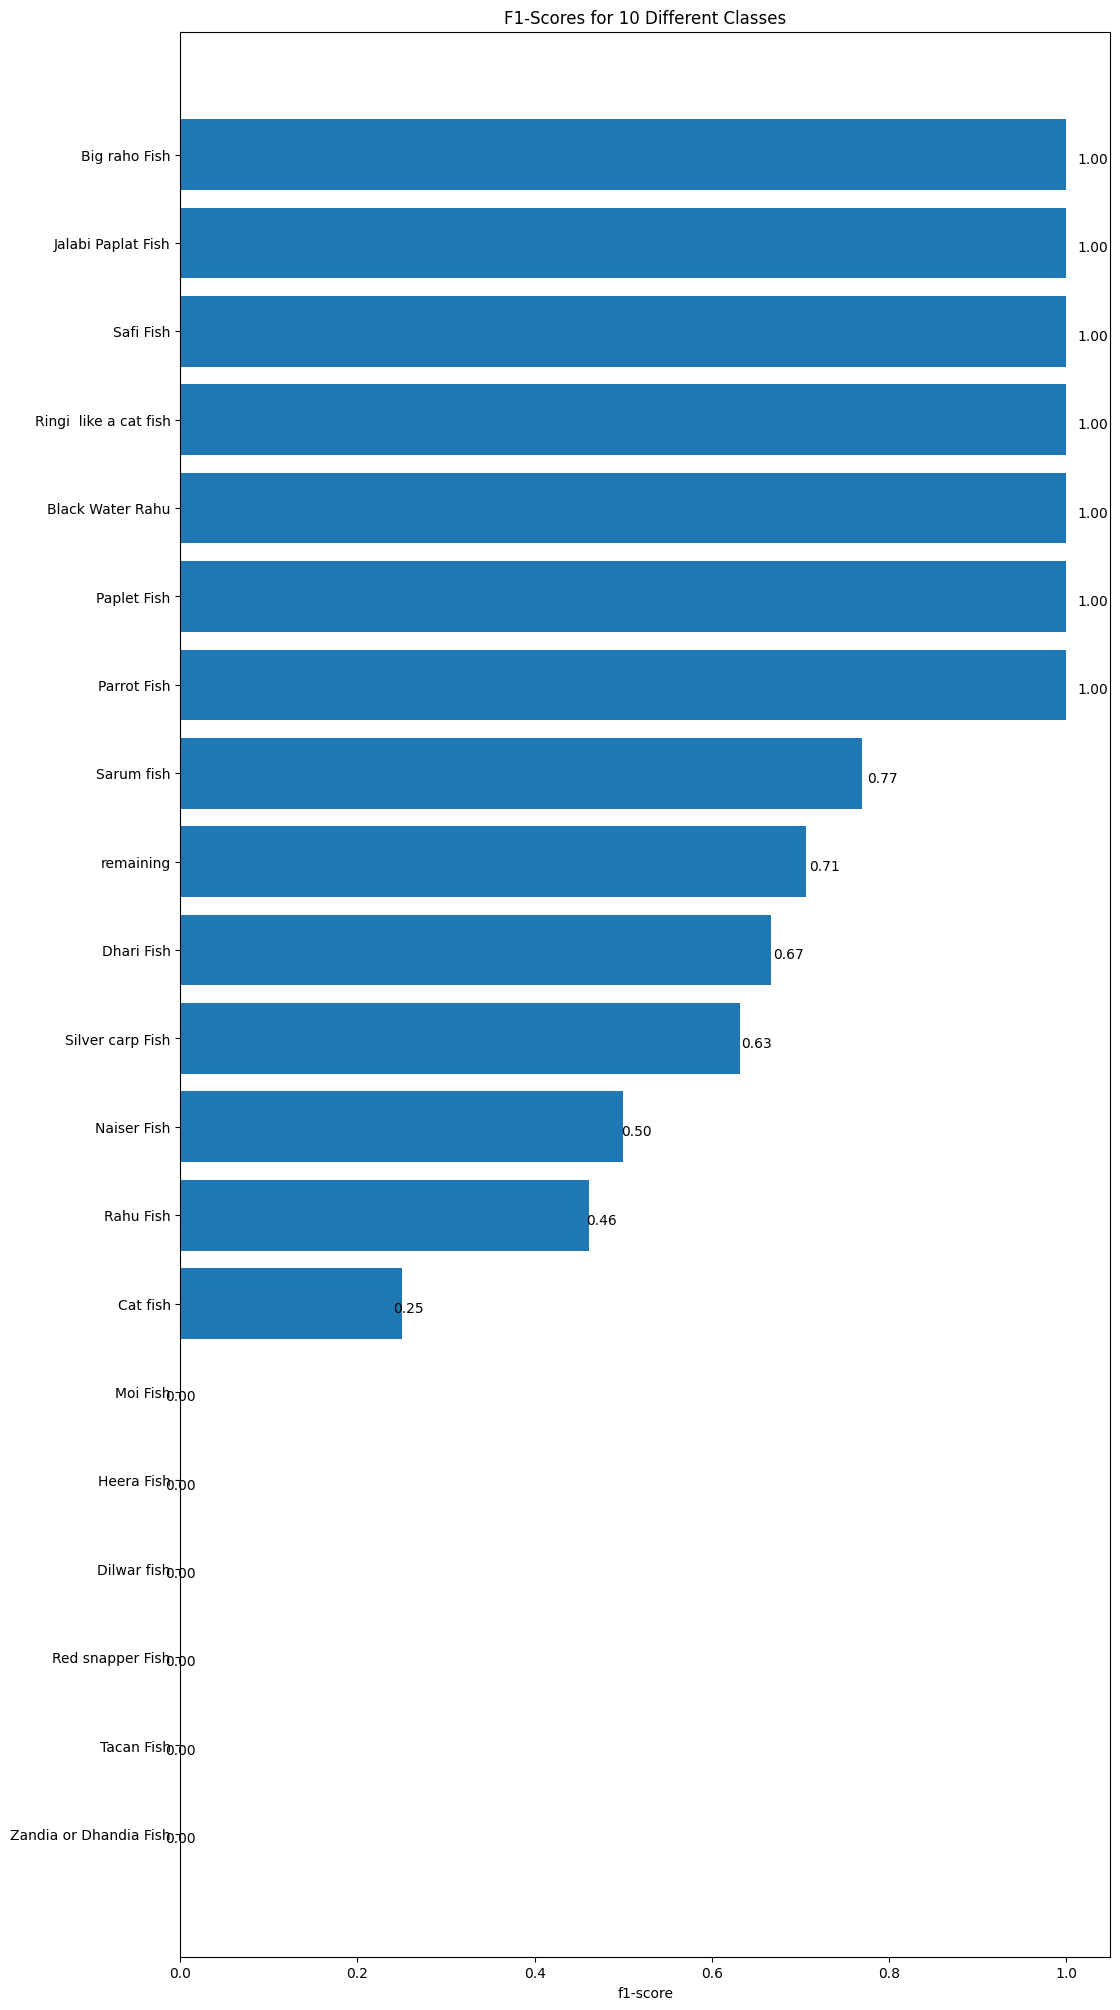

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [40]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 29ms/step


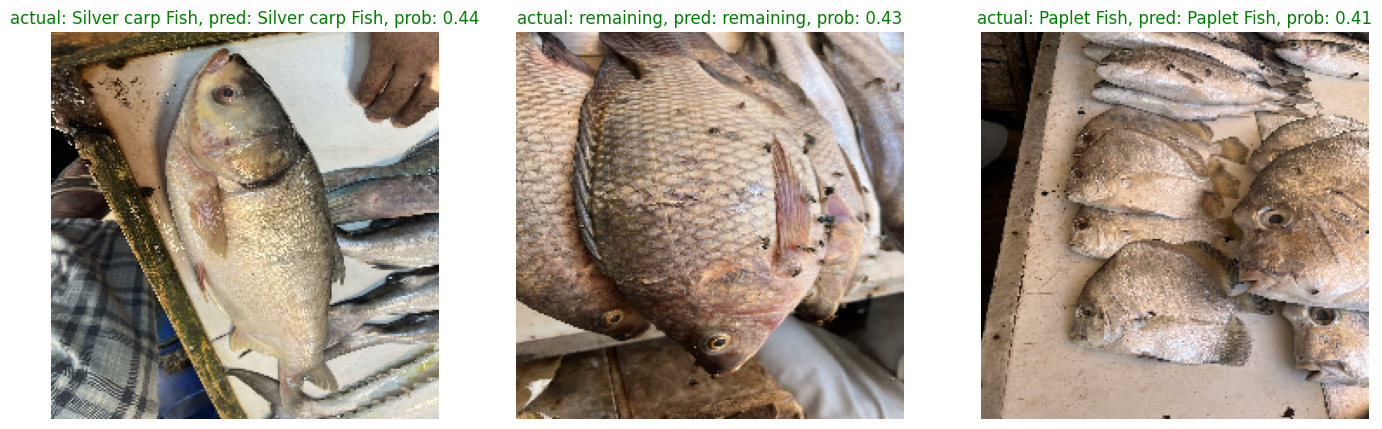

In [50]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [42]:
# 1. Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/*/*.JPG",
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Big raho Fish/IMG_1816.JPG',
 b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Big raho Fish/IMG_1817.JPG',
 b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Big raho Fish/IMG_1820.JPG',
 b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Big raho Fish/IMG_1826.JPG',
 b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Black Water Rahu/IMG_1884.JPG',
 b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Black Water Rahu/IMG_1885.JPG',
 b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Black Water Rahu/IMG_1889.JPG',
 b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Cat fish/IMG_1747.JPG',
 b'/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Cat fish

In [43]:
# 2. Create a dataframe out of current prediction data for analysis
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  \
0  b'/content/drive/MyDrive/Halal Fishes Dataset/...       0       0   
1  b'/content/drive/MyDrive/Halal Fishes Dataset/...       0       0   
2  b'/content/drive/MyDrive/Halal Fishes Dataset/...       0       0   
3  b'/content/drive/MyDrive/Halal Fishes Dataset/...       0       0   
4  b'/content/drive/MyDrive/Halal Fishes Dataset/...       1       1   

   pred_conf  y_true_classname  y_pred_classname  
0   0.328650     Big raho Fish     Big raho Fish  
1   0.312381     Big raho Fish     Big raho Fish  
2   0.524542     Big raho Fish     Big raho Fish  
3   0.470896     Big raho Fish     Big raho Fish  
4   0.591496  Black Water Rahu  Black Water Rahu

In [44]:
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'/content/drive/MyDrive/Halal Fishes Dataset/...       0       0   
1  b'/content/drive/MyDrive/Halal Fishes Dataset/...       0       0   
2  b'/content/drive/MyDrive/Halal Fishes Dataset/...       0       0   
3  b'/content/drive/MyDrive/Halal Fishes Dataset/...       0       0   
4  b'/content/drive/MyDrive/Halal Fishes Dataset/...       1       1   

   pred_conf  y_true_classname  y_pred_classname  pred_correct  
0   0.328650     Big raho Fish     Big raho Fish          True  
1   0.312381     Big raho Fish     Big raho Fish          True  
2   0.524542     Big raho Fish     Big raho Fish          True  
3   0.470896     Big raho Fish     Big raho Fish          True  
4   0.591496  Black Water Rahu  Black Water Rahu          True

In [45]:
# 4. Get the top wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
18  b'/content/drive/MyDrive/Halal Fishes Dataset/...       5      19   
19  b'/content/drive/MyDrive/Halal Fishes Dataset/...       5      19   
17  b'/content/drive/MyDrive/Halal Fishes Dataset/...       5      19   
25  b'/content/drive/MyDrive/Halal Fishes Dataset/...       7      16   
63  b'/content/drive/MyDrive/Halal Fishes Dataset/...      18      11   
26  b'/content/drive/MyDrive/Halal Fishes Dataset/...       8      15   
36  b'/content/drive/MyDrive/Halal Fishes Dataset/...      11      12   
42  b'/content/drive/MyDrive/Halal Fishes Dataset/...      12      11   
35  b'/content/drive/MyDrive/Halal Fishes Dataset/...      11      12   
16  b'/content/drive/MyDrive/Halal Fishes Dataset/...       4      19   
37  b'/content/drive/MyDrive/Halal Fishes Dataset/...      11       2   
38  b'/content/drive/MyDrive/Halal Fishes Dataset/...      11       2   
27  b'/content/drive/MyDrive/Halal Fishes Dataset/...       8      19   
41  b'/content/drive/MyDrive/Halal Fishes Dataset/...      12      11   
49  b'/content/drive/MyDrive/Halal Fishes Dataset/...      15      16   
61  b'/content/drive/MyDrive/Halal Fishes Dataset/...      17      16   
24  b'/content/drive/MyDrive/Halal Fishes Dataset/...       7      16   
7   b'/content/drive/MyDrive/Halal Fishes Dataset/...       2       3   
9   b'/content/drive/MyDrive/Halal Fishes Dataset/...       2       3   
62  b'/content/drive/MyDrive/Halal Fishes Dataset/...      17      16   

    pred_conf        y_true_classname  y_pred_classname  pred_correct  
18   0.641914              Heera Fish         remaining         False  
19   0.554396              Heera Fish         remaining         False  
17   0.454498              Heera Fish         remaining         False  
25   0.347795                Moi Fish  Silver carp Fish         False  
63   0.326792  Zandia or Dhandia Fish         Rahu Fish         False  
26   0.301336             Naiser Fish        Sarum fish         False  
36   0.292436               Rahu Fish  Red snapper Fish         False  
42   0.270690        Red snapper Fish         Rahu Fish         False  
35   0.264033               Rahu Fish  Red snapper Fish         False  
16   0.248134             Dilwar fish         remaining         False  
37   0.240879               Rahu Fish          Cat fish         False  
38   0.238370               Rahu Fish          Cat fish         False  
27   0.226642             Naiser Fish         remaining         False  
41   0.223062        Red snapper Fish         Rahu Fish         False  
49   0.219776              Sarum fish  Silver carp Fish         False  
61   0.219032              Tacan Fish  Silver carp Fish         False  
24   0.215987                Moi Fish  Silver carp Fish         False  
7    0.211499                Cat fish        Dhari Fish         False  
9    0.199639                Cat fish        Dhari Fish         False  
62   0.191143              Tacan Fish  Silver carp Fish         False

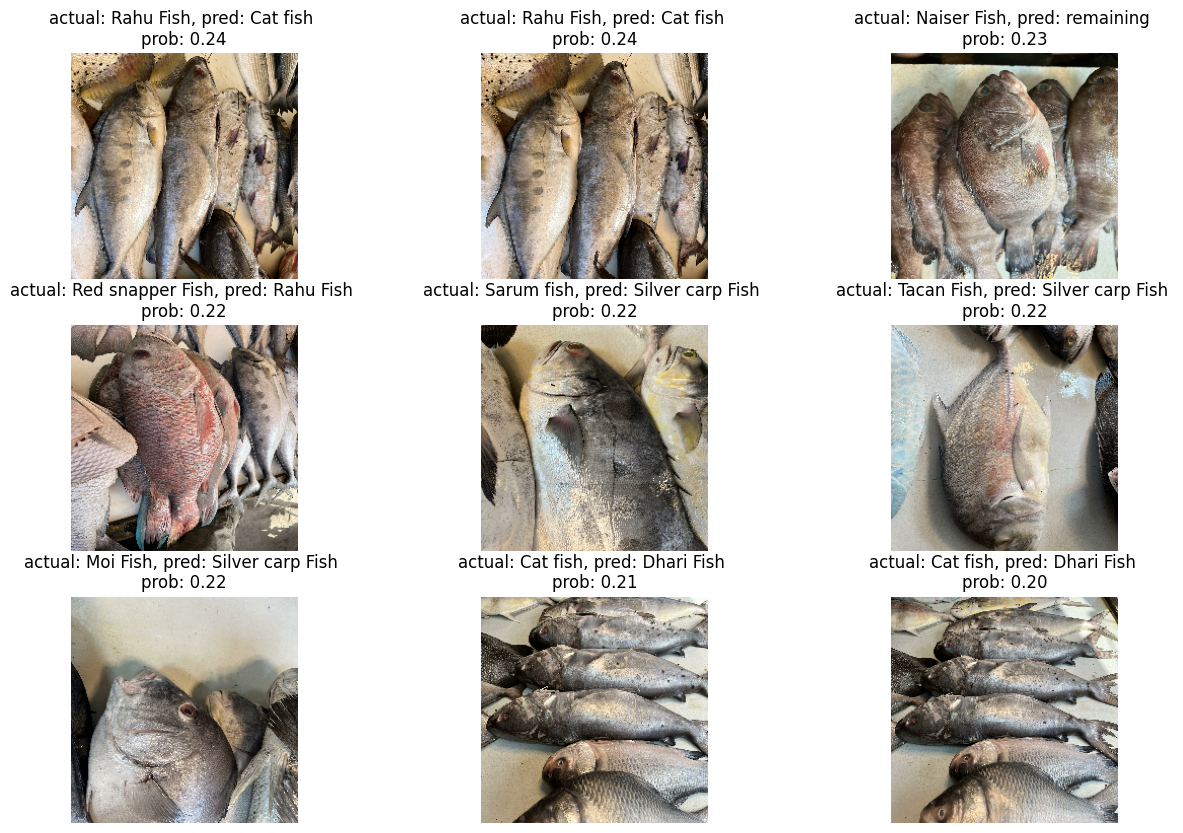

In [46]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

In [53]:
from google.colab import drive
import os


# Define the directory where your images are located in Google Drive
image_directory = "/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Silver carp Fish"

# List all image file paths in the specified directory
custom_food_images = [os.path.join(image_directory, img_path) for img_path in os.listdir(image_directory)]

# Print the list of image file paths
print(custom_food_images)


['/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Silver carp Fish/IMG_1792.JPG', '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Silver carp Fish/IMG_1807.JPG', '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Silver carp Fish/IMG_1810.JPG', '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Silver carp Fish/IMG_1801.JPG', '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Silver carp Fish/IMG_1790.JPG', '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Silver carp Fish/IMG_1793.JPG']


1/1 [==============================] - 0s 31ms/step


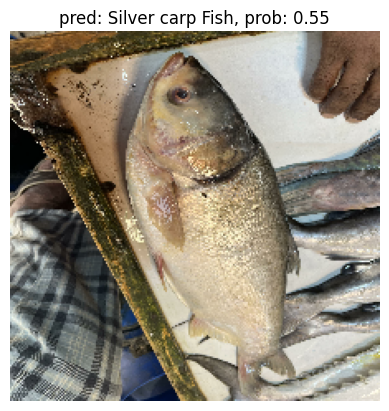

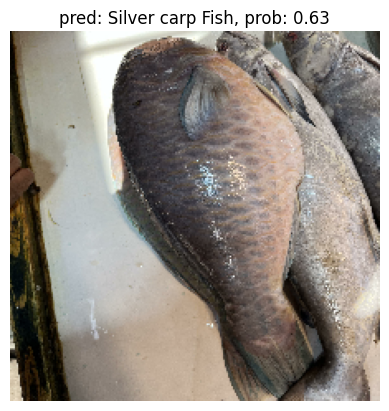

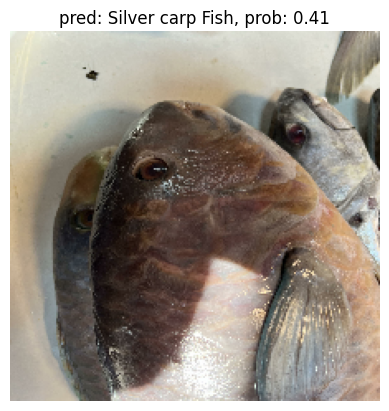

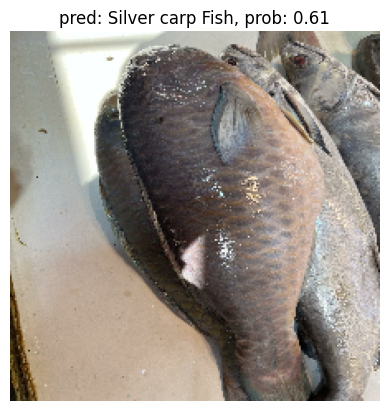

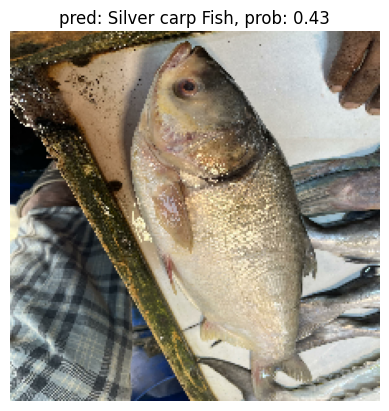

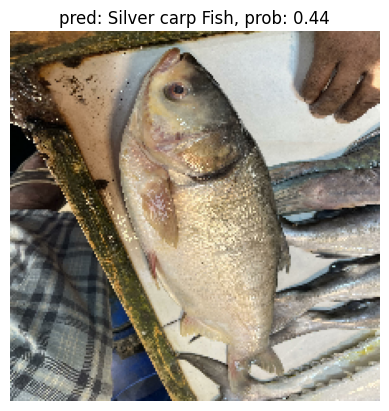

In [54]:
# Make predictions on custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label
  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)